# Project: Finding the Best Markets to Advertise in

An e-learning company offers courses on programming. Most of the courses are on web and mobile development, but the company also covers many other domains, like data science, game development, etc. The management would like to invest some money in advertisement. The goal in this project is to find out the two best markets to advertise the products in.

We will use data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). It's a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Making settings to display all columns
pd.set_option('display.max_columns', None)

## 1. Reading the data in

In [2]:
#Reading the survey file into a dataframe
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
survey_data.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,ExpectedEarning,FinanciallySupporting,FirstDevJob,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobRelocateYesNo,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston
count,15367.000000,17709.000000,1069.000000,1079.000000,1073.000000,2314.000000,1609.0,165.0,1708.0,290.0,297.0,1977.0,2472.0,446.0,1076.0,133.0,132.0,544.0,547.0,481.0,1753.0,7200.000000,3833.000000,4508.000000,3858.000000,15291.000000,15329.000000,15380.000000,6397.000000,15256.000000,6402.000000,1371.000000,16714.000000,7623.000000,15293.000000,15222.000000,18068.000000,9223.000000,3201.0,1470.0,1940.0,1092.0,4047.0,4831.0,1875.0,1560.0,2677.0,939.0,584.0,1691.0,6503.000000,16577.000000,17084.000000,403.0,1636.0,773.0,728.0,327.0,187.0,726.0,1123.0,1061.0,345.0,333.0,790.0,408.0,318.0,655.0,311.0,9390.0,1848.0,4402.0,4671.0,3243.0,1341.0,13803.0,2049.0,3800.0,2558.0,6417.0,976.0,2392.0,452.0,11207.0,2260.0,3837.0,5120.0,9765.0,3362.000000,956.0,976.0,1397.0,1453.0,1847.0,2619.0,993.0,6036.0,1261.0,3539.0,2662.0,1396.0,3327.0,622.0,201.0,2960.0
mean,27.691872,0.062002,0.699719,0.305839,0.818267,1.832325,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,56169.169306,0.227498,0.572981,0.609383,0.420901,0.252463,0.854811,0.269970,0.075511,0.568416,166541.105033,15.609250,43169.357864,0.238083,0.024241,0.250609,0.434674,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.771644,957.299753,20.790447,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31602.625521,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.559239,0.241167,0.458594,0.460975,0.385805,0.972813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74811.725422,0.419271,0.494700,0.487952,0.493720,0.434439,0.352302,0.443979,0.264223,0.495336,137761.450348,15.283681,61812.293272,0.425924,0.153802,0.433376,0.495741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419806,5003.003169,41.722826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39383.187732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

The dataframe has 18175 rows and 136 columns, including 105 columns with numerical data.

In [5]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## 2. Checking for sample representativity

The column "JobRoleInterest" describes for every participant the role(s) they'd be interested in working. Let us see the distribution of answers to this question.

In [6]:
#Dropping NA values
job_interest = survey_data["JobRoleInterest"].dropna()
job_interest.count()

6992

In [7]:
#Counting frequencies of different values
job_interest.value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                                                                                                            6.435927
  Data Scientist                                                                                                                                                                                                                     2.173913
Back-End Web Developer                                                                                                                                                                                                               2.030892
  Mobile Developer                              

We see that most people are interested in several subjects and it's impossible to calculate the frequency for each individul subject based on these data. Let's convert multiple values into lists.

In [8]:
#Splitting multiple values into lists
job_interest_split = job_interest.str.split(pat = ',')
job_interest_split.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [9]:
#Calculating the number of roles for each respondent
number_of_subjects = job_interest_split.apply(lambda x: len(x))
number_of_subjects.head(10)

1     1
2     5
3     3
4     5
6     1
9     6
11    4
13    3
14    1
15    1
Name: JobRoleInterest, dtype: int64

In [10]:
#Calculating the percentage of respondents who named each number of roles
percentage_subjects = number_of_subjects.value_counts(normalize = True).sort_index()*100
percentage_subjects

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

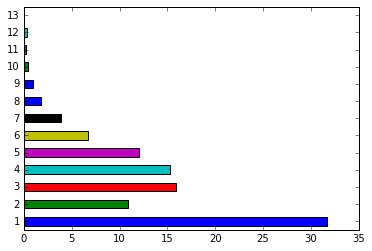

In [11]:
#Plotting what share of respondents named each number of roles
percentage_subjects.plot.barh()

In [12]:
#Calculating the mean number of roles
number_of_subjects.mean()

3.232265446224256

In [13]:
#Calculating the mode
number_of_subjects.mode()[0]

1

We see that only 31.7% of respondents who named the roles they are interested in focus on one specific role. More than half name 2 to 5 different roles, with the average equal to 3.2 roles. Somebody named as many as 13 diffeent roles.

Let's see if the sample includes enough people interested in web or mobile development.

In [14]:
#Selecting respondents who mention web or mobile or development
web_or_mobile = job_interest.str.contains("Web|Mobile")
web_or_mobile.value_counts()

True     6034
False     958
Name: JobRoleInterest, dtype: int64

We see that the vast majority of respondents who named the roles they are interested in mentioned either web or movile development -- 6034 out of 6992, or 86.3%. This leads us to the conclusion that the sample is representative for our purposes.

## 3. Analyzing location data

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities for each location.
For our analysis, we'll work with the "CountryLive" column because we're interested where people actually live at the moment when we run the ads. 

In [15]:
#Leaving only the respondents who specified the roles they are interested in
survey_data_rep = survey_data[survey_data["JobRoleInterest"].notnull()]
survey_data_rep.shape

(6992, 136)

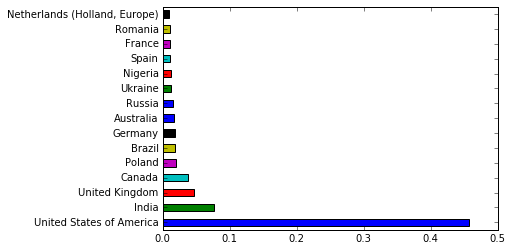

In [16]:
#Plotting the top 15 countries
survey_data_rep["CountryLive"].value_counts(normalize = True).head(15).plot.barh()

In [17]:
#Counting the numbers for each of the top 15 countreis
values = survey_data_rep["CountryLive"].value_counts().head(15)
percentages = survey_data_rep["CountryLive"].value_counts(normalize = True).head(15)*100

top_15_countries = pd.DataFrame({"Abosulte frequencies":values, "Percentages":percentages})
top_15_countries

,Abosulte frequencies,Percentages
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


We see that almost half of the group come from the United States. The other countries in top 3 are India with less than 10% and UK with les than 5%.

## 4. Calculating how much students spend per month

Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable. Therefore we are interested in selecting the market where students have the highest spend on coding courses.  
The company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.
We will use the data in the column "MoneyForLearning" which specifies how much money survey participants have spend on their coding education from the starting moment until the survey.
It also seems expedient to narrow down our analysis to only four countries: the USA, India, the United Kingdom, and Canada because they were on top of our list and also becasue our courses are in English. The more people that know English in the advertising market, the better our chances to target the right people with our ads.

In [18]:
#Selecting the data for top countries
top_countries = ["United States of America", "India", "United Kingdom", "Canada"]
survey_data_top = survey_data_rep[survey_data_rep["CountryLive"].isin(top_countries)]

#Replacing zeros with ones in the column with the number of months
survey_data_top["MonthsProgramming"] = survey_data_top["MonthsProgramming"].replace(0,1)

#Calculating the monthly spend on coding courses
survey_data_top["MonthlySpend"] = survey_data_top["MoneyForLearning"] / survey_data_top["MonthsProgramming"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
#Analyzing calculation results
survey_data_top["MonthlySpend"].describe()

count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: MonthlySpend, dtype: float64

In [20]:
#Removing respondents with null spend
survey_data_top_nonull = survey_data_top[survey_data_top["MonthlySpend"] > 0]

In [21]:
#Checking the results
survey_data_top_nonull["MonthlySpend"].describe()

count     2071.000000
mean       372.388516
std       2325.112108
min          0.033333
25%         10.000000
50%         33.333333
75%        150.000000
max      80000.000000
Name: MonthlySpend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



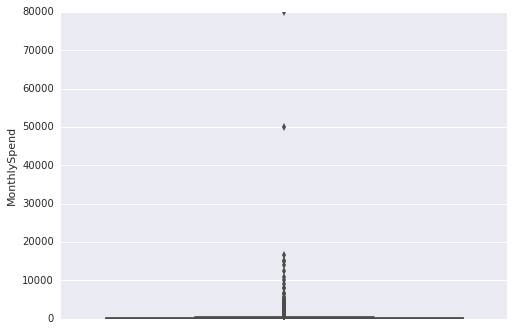

In [22]:
#Vizualizing outliers
import seaborn as sns
sns.boxplot(x = "MonthlySpend", data = survey_data_top_nonull, orient = "vertical")

We can conclude that any values above USD 20,000 are obvious outliers.

In [23]:
#Removing outliers
survey_data_precleaned = survey_data_top_nonull[survey_data_top_nonull["MonthlySpend"] <= 20000] 

In [30]:
#Checking the results
survey_data_precleaned["MonthlySpend"].describe()

count     2069.000000
mean       309.916199
std       1072.604089
min          0.033333
25%         10.000000
50%         33.333333
75%        150.000000
max      16666.666667
Name: MonthlySpend, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



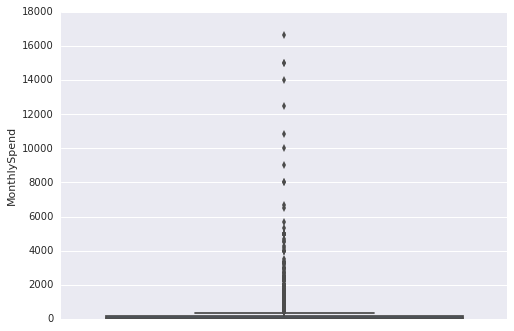

In [31]:
#Checking for outliers again 
sns.boxplot(x = "MonthlySpend", data = survey_data_precleaned, orient = "vertical", whis = 1.5)

For the purposes of our analysis we will also remove all the values above USD 4,000.

In [36]:
#Removing outliers
survey_data_clean = survey_data_precleaned[survey_data_precleaned["MonthlySpend"] <= 4000]

In [37]:
#Checking the results
survey_data_clean["MonthlySpend"].describe()

count    2041.000000
mean      211.130140
std       500.070007
min         0.033333
25%        10.000000
50%        33.333333
75%       136.363636
max      4000.000000
Name: MonthlySpend, dtype: float64

In [38]:
#Calculating average by country
group_by_country = survey_data_clean.groupby("CountryLive")
monthly_spend_by_country = group_by_country["MonthlySpend"]
mean_mothly_spend_by_country = monthly_spend_by_country.mean()
mean_mothly_spend_by_country.sort_values(ascending = False)

CountryLive
United States of America    227.325886
Canada                      196.837439
India                       170.332082
United Kingdom               92.730727
Name: MonthlySpend, dtype: float64

According to the results, the USA has the highest monthly spend per student equal to USD 227. Canada and India also have relatively high values with USD 197 and 170, respectively.
Considering that our monthly subsription is USD 59, let's see the share of respondents in the three top countries who pay more than that per month.

In [40]:
#Leaving out the UK
survey_data_three_countries = survey_data_clean[survey_data_clean["CountryLive"] != "United Kingdom"]
survey_data_three_countries["CountryLive"].value_counts()

United States of America    1595
India                        196
Canada                       113
Name: CountryLive, dtype: int64

In [46]:
# Calculating the share of respondents in each country paying at least USD 59
countries_dic = {"United States of America":1595, "India":196, "Canada":113}
countries = ["United States of America", "India", "Canada"]
countries_share = {}

for country in countries:
    country_slice = survey_data_three_countries[survey_data_three_countries["CountryLive"] == country]
    above_59 = country_slice[country_slice["MonthlySpend"] >= 59]
    share = above_59["MonthlySpend"].count() / countries_dic[country] *100
    countries_share[country] = share

countries_share                                          

{'Canada': 34.51327433628318,
 'India': 35.714285714285715,
 'United States of America': 40.12539184952978}

We see that the USA also has the highest share of the audience that pays at least USD 59 per month -- over 40%. canada and India have roughly the same share -- slightly above one thrid of the audience.

# Conclusion

Based on the results of our analysis, we recommend to choose the USA as the main target market for the advertising campaign.
Depending on the marketing budget and revenue targets, the advertising campaign could also include India and Canada but it's important to choose the channels that cover the audience with the above-average spend.